In [29]:
#import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
from skimage.feature import hog
from joblib import Parallel, delayed
from skimage import data, exposure, io


import numpy as np





In [19]:
threads = 6
subset = 'test'

folder = ".."+os.sep+"data"+os.sep
file =  subset + os.sep + subset + ".csv"

df = pd.read_csv(folder + file,sep=",")
df.head()

,observationid,mediaid,vote,content,classid,family,genus,species,author,date,location,latitude,longitude,yearinclef,observationid2014,imageid2014,learntag
0,36886,99451,4.0,Flower,8534,Ranunculaceae,Aconitum,Aconitum napellus L.,thierry pernot,1800-1-1,NaN,NaN,NaN,PlantCLEF2014,208.0,22422.0,Train
1,31390,71276,3.0,Flower,2394,Cistaceae,Cistus,Cistus albidus L.,herve goeau,2013-6-5,Paris,48.84059,2.36158,PlantCLEF2014,2338.0,43988.0,Train
2,38327,61697,4.0,Flower,493,Asteraceae,Bellis,Bellis perennis L.,alexis joly,2014-3-8,Clermont-L'Hérault,43.64690,3.38675,PlantCLEF2015,NaN,NaN,Train
3,5105,34873,4.0,Flower,661,Asteraceae,Cichorium,Cichorium intybus L.,liliane roubaudi,2013-9-13,Fleury,NaN,NaN,PlantCLEF2014,3130.0,20340.0,Train
4,18307,56154,4.0,Flower,588,Asteraceae,Centaurea,Centaurea jacea L.,liliane roubaudi,2014-9-5,Vézins-de-Lévézou,NaN,NaN,PlantCLEF2015,NaN,NaN,Train


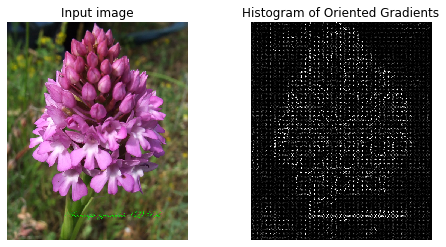

In [20]:

image = io.imread(folder + 'train' +os.sep +'281.jpg')


fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')


hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.set_title('Histogram of Oriented Gradients')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)

plt.show()